# From Math to Code: Python for Derivatives and Integrals

In this episode, we'll focus on two fundamental concepts in calculus: derivatives and integrals. These concepts play a pivotal role in understanding how things change and accumulate in the real world. To make this journey even more engaging and accessible, we'll be harnessing the power of the Python programming language.

## Derivatives

### Line expression

Before we dive into the Python implementation, let's establish a solid understanding of the two-point form of a line. The two-point form is a mathematical representation that helps us find the equation of a line when we know two distinct points it passes through. The formula for the two-point form is:

$$
\frac{x - x_0}{x_1 - x_0} = \frac{y - y_0}{y_1 - y_0},
$$

where $(x_1, y_1)$ and $(x_0, y_0)$ are coordinates of two given points. We can rewrite it in the following way:

$$y = x \cdot \frac{y_1 - y_0}{x_1 - x_0} + y_0 - x_0 \cdot \frac{y_1 - y_0}{x_1 - x_0}.$$


Now that we have a grasp of the mathematical foundation, let's leverage the simplicity and power of Python to implement the two-point form.
In the beginnin let's just import all packages:

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

In [7]:
from myst_nb import glue
plt.rcParams['figure.dpi'] = 300
plt.rcParams["animation.html"] = "html5"

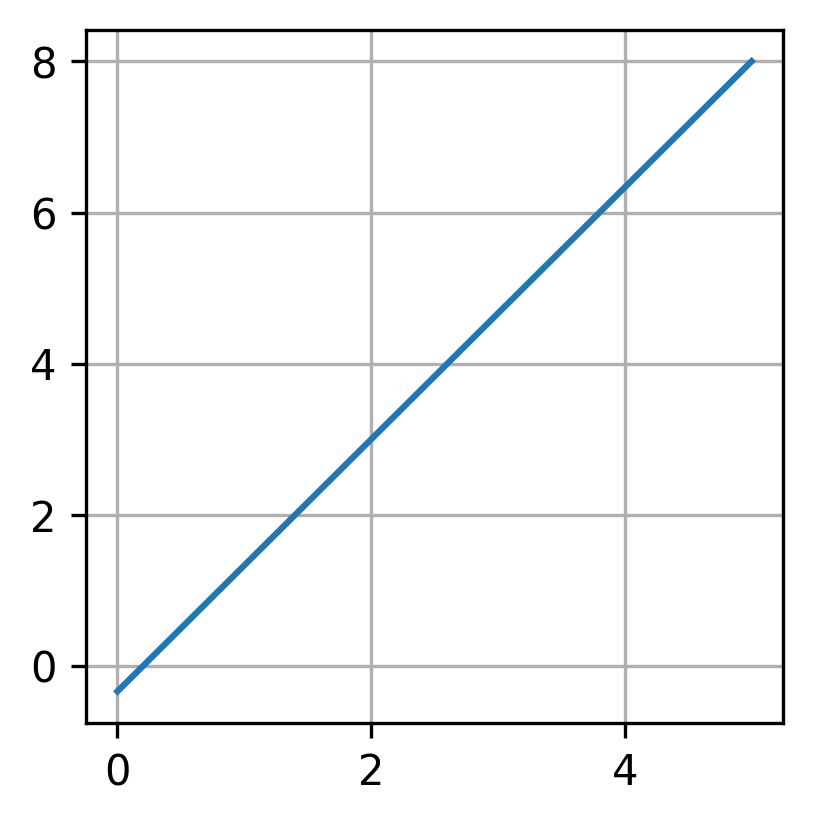

In [8]:
def line(x, x0, y0, x1, y1):
    slope = (y1 - y0) / (x1 - x0)
    return x * slope + y0 - x0 * slope

line_vec = np.vectorize(line)

x0, y0 = 2, 3
x1, y1 = 5, 8

x_rng = np.linspace(0, 5, 100)

fig = plt.figure(figsize = (3, 3))
plt.plot(x_rng, line_vec(x_rng, x0, y0, x1, y1))
plt.grid(True)

In [9]:
glue("line", fig, display=False)

```{glue:figure} line
:height: 360px
```

Once you grasp the straightforward process of determining the line between two points, the concept of derivatives becomes an accessible extension. It's like unlocking a key principle in calculus that opens the door to a broader understanding.

### Derivative

I notice in life that people often use different ideas to make things simpler. In my view, the derivative does the same thing but in the world of calculus. Sometimes, we want to understand how a function behaves. But these functions can be really complicated. So, what we can do is look at them closely by using a simple straight line instead. It's like zooming in on a small part of the function to get a better understanding. This helps us deal with the complexity and see how the function acts in a specific area.


You might wonder why we bother analyzing functions in the first place. Well, the reason is, we're often on the lookout for the smallest and biggest values that a function can have. These are called the minimum and maximum points. Understanding how a function behaves helps us pinpoint these important spots, which can be crucial in various fields.

For instance, in *machine learning*, optimizing functions is fundamental for training models to make accurate predictions. Imagine fine-tuning the parameters of a neural network to minimize errors in predicting outcomes.

Similarly, in *economics*, businesses aim to maximize profits or minimize costs by optimizing functions that represent various aspects of their operations. It's like finding the best strategy for financial success.


I mentioned that we're aiming to estimate our function locally using a linear expression. Let's express that idea mathematically:

$$ f(x_0 + \Delta x) - f(x_0) \approx \alpha \left( (x_0 + \Delta x) - x_0 \right) $$

In this equation, $x_0$ represents the specific point around which we intend to approximate our function $f$, and $\Delta x$ defines the extent of our approximation range. The expression $f(x_0 + \Delta x) - f(x_0)$ captures the change in the function over this range, and we're approximating it by a linear term $\alpha \left( (x_0 + \Delta x) - x_0 \right)$. The constant $\alpha$ helps scale and determine the slope of our linear approximation.

If we label $f(x_0 + \Delta x)$ as $y$ and $(x_0 + \Delta x)$ as $x$, we end up with the same linear expression we discussed in the previous section.

Now let's just put all of this in the form of code.
In the beginning I will define function that I want to analyze:

In [10]:
def f(arg):
    return np.abs(arg) * np.sin(arg)

f_vec = np.vectorize(f)

x_rng = np.linspace(-1, 1, 101)
y_orig = f_vec(x_rng)

Let's plot our function:

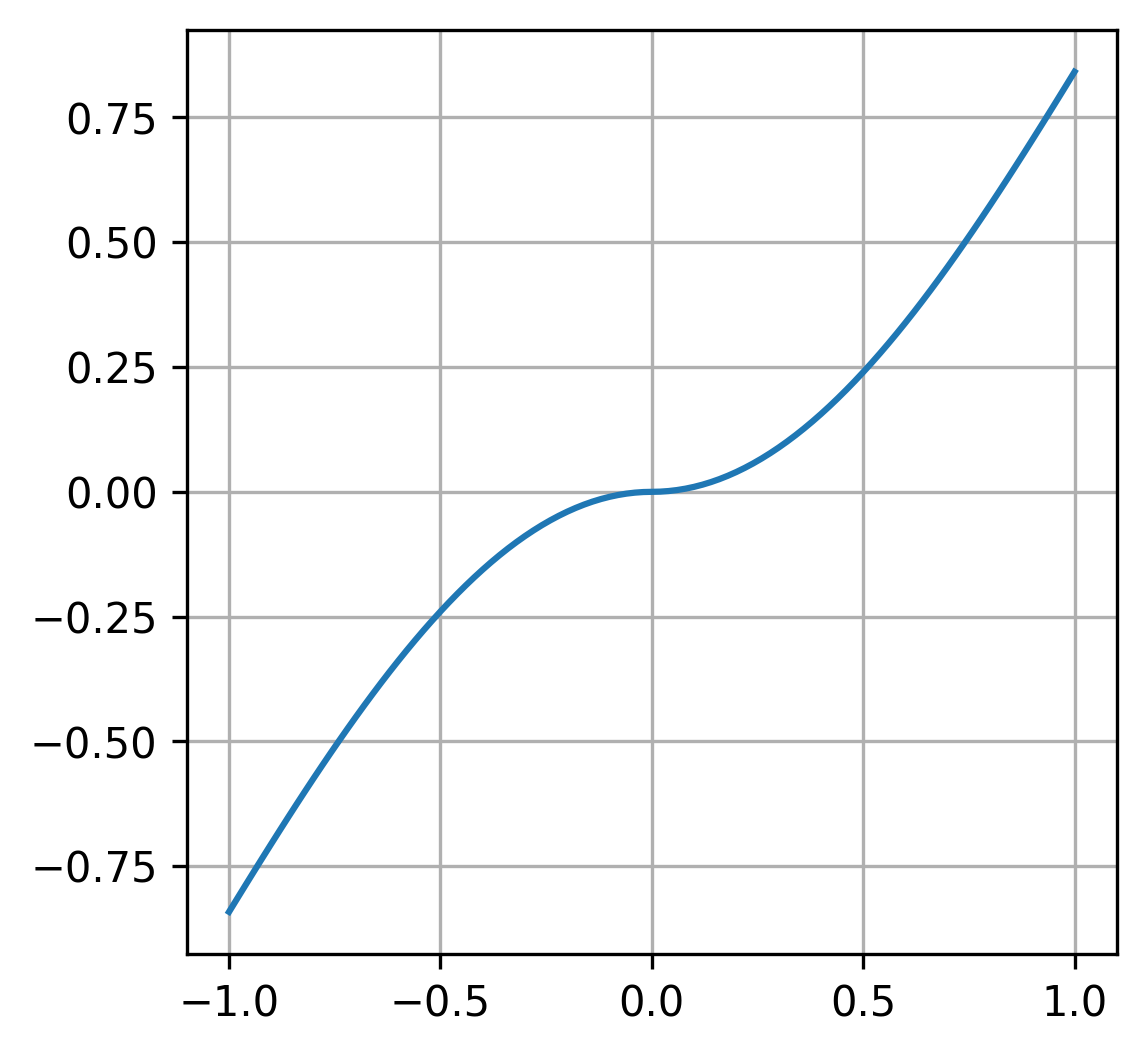

In [11]:
fig = plt.figure(figsize = (4, 4))

plt.plot(x_rng, y_orig)
plt.grid(True)

In [12]:
glue("f", fig, display=False)

```{glue:figure} f
:height: 360px
```

Let's assign values to our variables: $x_0 = 0$, $\Delta x = 1$. Now, let's examine what our approximation looks like:

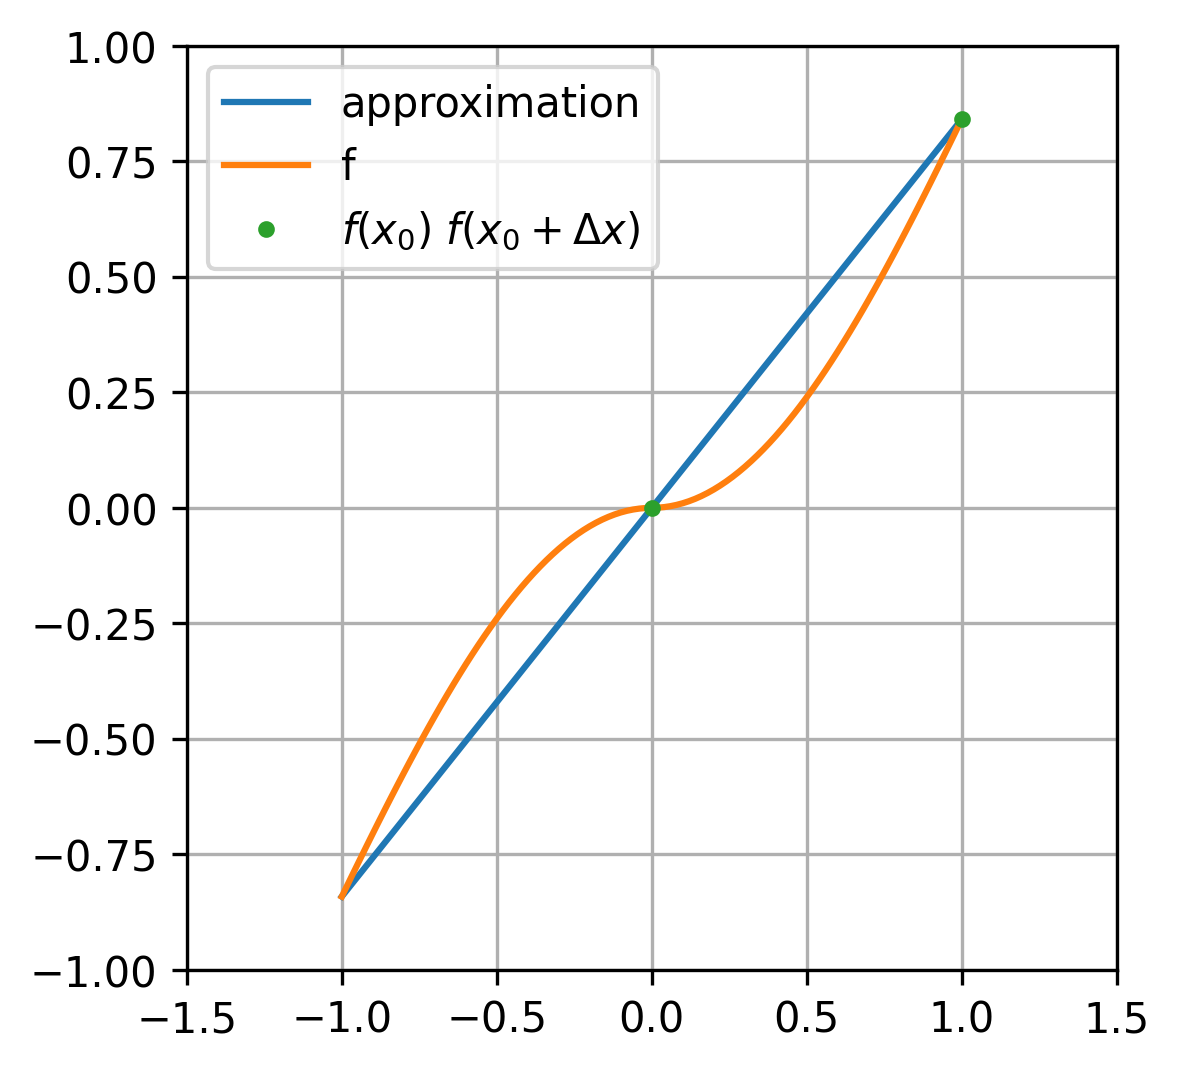

In [13]:
fig, ax = plt.subplots(figsize = (4, 4))

ax.set(xlim = (-1.5, 1.5), ylim = (-1, 1))

x0 = 0
deltax = 1

alpha = (f(x0 + deltax) - f(x0)) / deltax
y_approx = np.array([alpha * x for x in x_rng])

line_approx = ax.plot(x_rng, y_approx, label="approximation")
ax.plot(x_rng, y_orig, label='f')
points = ax.plot([x0, x0 + deltax], [f(x0), f(x0 + deltax)], ".", label=r'$f(x_0) \ f(x_0 + \Delta x)$')

leg = plt.legend(loc='upper left')
plt.grid(True)

In [14]:
glue("approx", fig, display=False)

```{glue:figure} approx
:height: 360px
```

Alright, we have our initial approximation, but we can enhance it for our specific local point $x_0 = 0$ by attempting to reduce the value of $\Delta x \rightarrow 0$.
To visualize this process, I'll utilize the `animation` module from the `matplotlib` package:

In [15]:
def animate(i):
    dx = 1 - 0.01 * i
    alpha = (f(x0 + dx) - f(x0)) / dx
    line_approx[0].set_ydata([alpha * x for x in x_rng])
    points[0].set_xdata([x0, x0 + dx])
    points[0].set_ydata([f(x0), f(x0 + dx)])

In [16]:
anim = animation.FuncAnimation(fig, animate, interval = 100, frames = 100)

In [17]:
glue("derivative", anim, display=False)

RuntimeError: Requested MovieWriter (ffmpeg) not available

```{glue:figure} derivative
:figwidth: 460px
```



Great! Now, we know how to approximate our functions using derivatives. Essentially, the expression for a derivative can be represented as follows:

$$f'(x_0) = \lim\limits_{\Delta x \rightarrow 0} \frac{f\left(x_0 + \Delta x\right) - f(x_0)}{\Delta x} \approx \alpha$$

At the end, let's carry out the same procedure, but this time, we'll keep $\Delta x = 0.01$ constant and vary the value of $x_0$:

In [ ]:
fig, ax = plt.subplots(figsize = (4, 4))

ax.set(xlim = (-10, 10), ylim = (-9, 9))

dx_fixed = 0.01
x0 = -9
alpha = (f(x0 + dx_fixed) - f(x0)) / dx_fixed

x_domain = np.linspace(-10, 10, 1001)

y = [f(arg) for arg in x_domain]

ax.plot(x_domain, y)
ax.grid()

line_approx = ax.plot(x_domain, [alpha * (x - x0) + f(x0) for x in x_domain])
point = ax.plot([x0], [f(x0)], '.')

In [ ]:
glue("approx_large", fig, display=False)

```{glue:figure} approx_large
:height: 360px
```

This our initial state and now let's animate it:

In [ ]:
def animate(i):
    x0_loc = x0 + 0.1 * i
    alpha = (f(x0_loc + dx_fixed) - f(x0_loc)) / dx_fixed
    line_approx[0].set_ydata([alpha * (x - x0_loc) + f(x0_loc) for x in x_domain])
    point[0].set_xdata([x0_loc])
    point[0].set_ydata([f(x0_loc)])

In [ ]:
anim = animation.FuncAnimation(fig, animate, interval = 100, frames = 200)

In [ ]:
glue("sliding_derivative", anim, display=False)

```{glue:figure} sliding_derivative
:figwidth: 460px
```

## Integrals

### Definite Integral


Now, let's transition to another vital concept in calculus: integrals. The underlying approach here is akin to what we've explored with derivatives. It involves breaking down a complex object into smaller, more manageable parts for a clearer description.

In this episode, our focus is on understanding integrals by examining the area under the curve. Much like how derivatives provide insights into rates of change, integrals offer a powerful tool for quantifying accumulated quantities and exploring the total "area" covered by a function. So, let's embark on this journey to unravel the significance of integrals and discover their role in depicting the cumulative aspects of mathematical functions.

I understand that delving into mathematical concepts may not be everyone's cup of tea. However, integrals play a crucial role across various scientific disciplines, acting as fundamental tools for sophisticated analysis.

Consider statistics, for instance – an essential field for understanding data and making informed decisions. Integrals serve as indispensable tools in statistical analysis, helping us compute probabilities, model distributions, and extract valuable insights from data patterns. Removing integrals from the toolkit of statistics would leave us with a significant gap in our ability to comprehend and interpret complex datasets. So, let's explore the role of integrals in these scientific realms and appreciate the depth they bring to our understanding of the world.


We will need some extra function from `matplotlib` package:

In [ ]:
from matplotlib.patches import Rectangle, Polygon

Let's start with calculation the integral (area under the curve) for some simple function:

In [ ]:
def f(x):
    return x ** 2

The formal mathematical definition of an integral can be expressed as follows:

$$ \int\limits_{a}^{b} f(x) dx = \lim\limits_{\Delta x \rightarrow 0} \sum\limits_{i = 0}^{n - 1} f(\xi_i) \Delta x_i,$$
where $a = x_0 < x_1 < x_2 < \ldots < x_n = b$, $\Delta x_i = x_{i + 1} - x_i$ and $\xi_i \in \left[x_i, x_{i + 1}\right]$. From this point, the concept involves dividing the entire interval $[a, b]$ into numerous small pieces and approximating the original function by utilizing rectangles. In essence, we're breaking down a complex shape into simpler components, where each rectangle captures the behavior of the function over a specific section of the interval.


Alright, let's proceed by dividing our interval $[a, b]$ into smaller pieces and visually represent the approximation using rectangles:

In [ ]:
fig = plt.figure(figsize = (4, 4))

ax = fig.add_subplot()
a = -4
b = 4

ax.set_xlim(a, b)
ax.set_ylim(0, a ** 2)

x = np.linspace(a, b, 101)
y = np.array([f(arg) for arg in x])

ax.plot(x, y, label = "f")

nrec = 5
for i in range(nrec):
    point = (a + (b - a) / nrec * i)
    width = (b - a) / nrec
    height = f(point)
    ax.add_patch(Rectangle((point, 0), width, height, alpha = 0.5, ec = "black"))


leg = plt.legend(loc='upper center')
plt.grid(True)

In [ ]:
glue("integral", fig, display=False)

```{glue:figure} integral
:height: 360px
```

Absolutely, at its core, this is what an integral is all about. Our next step involves calculating the area, and for rectangles (the reason we divided it this way), this process is straightforward. The key is to make those $\Delta x_i$ values really small, approaching zero. Let's put this concept into action and animate the process concurrently:

In [ ]:
total_area = ax.text(0.3, 0.75, "", transform=ax.transAxes)

def animate(rect_num):
    [p.remove() for p in reversed(ax.patches)]
    rect_num += 3
    
    area = 0
    
    for i in range(rect_num):
        point = (a + (b - a) / rect_num * i)
        width = (b - a) / rect_num
        h = point ** 2
        ax.add_patch(Rectangle((point, 0), width, h, alpha = 0.5, ec="black"))
        area += width * h
    total_area.set_text(f"approx area = {area:.3f}")

In [ ]:
anim = animation.FuncAnimation(fig, animate, interval = 100, frames = 100)

In [ ]:
glue("x2_area", anim, display=False)

```{glue:figure} x2_area
:figwidth: 460px
```



### Standard Normal Distribution


In conclusion, let's delve into the intricacies of the standard normal distribution. To be more precise, we'll explore the reasoning behind the coefficient in its probability density function:

$$p(x) = \frac{e^{-\frac{x^2}{2}}}{\sqrt{2 \cdot \pi}} $$


To check it, we'll calculate the integral for $e^{-\frac{x^2}{2}}$. Let's define this function in Python and explore its properties:

In [ ]:
def f(x):
    return np.exp(- x**2 / 2)

For the interval of interest, I'll employ $[a, b] = [-10, 10]$. Here, I'll admit to a slight trick, utilizing a characteristic of this function—namely, that the majority of its values are concentrated around 0. This allows us to explore the essential properties without the need for an extensive interval, making our analysis more efficient.

In [ ]:
fig = plt.figure(figsize = (4, 4))

ax = fig.add_subplot()
a = -10
b = -a

ax.set_xlim(a, b)
ax.set_ylim(0, 1.25 * f(0))

x = np.linspace(a, b, 1001)
y = np.array([f(arg) for arg in x])

ax.plot(x, y, 'm', label = "snd")

nrec = 5
for i in range(nrec):
    point = (a + (b - a) / nrec * i)
    width = (b - a) / nrec
    height = f(point)
    ax.add_patch(Rectangle((point, 0), width, height, alpha = 0.5, ec = "black"))


leg = plt.legend(loc='upper right')
plt.grid(True)

In [ ]:
glue("snd", fig, display=False)

```{glue:figure} snd
:height: 360px
```

In [ ]:
total_area = ax.text(0.01, 0.9, "", transform=ax.transAxes)

def animate(rect_num):
    [p.remove() for p in reversed(ax.patches)]
    rect_num += 3
    
    area = 0
    
    for i in range(rect_num):
        point = (a + (b - a) / rect_num * i)
        width = (b - a) / rect_num
        h = f(point + 0.5 * width)
        ax.add_patch(Rectangle((point, 0), width, h, alpha = 0.5, ec="black"))
        area += width * h
    total_area.set_text(f"area = {area:.5f}")

In [ ]:
anim = animation.FuncAnimation(fig, animate, interval = 100, frames = 100)

In [ ]:
glue("snd_video", anim, display=False)

```{glue:figure} snd_video
:figwidth: 460px
```

<!-- ```{glue:} snd_video
:width: 300px
``` -->